In [10]:
using HDF5
using PyPlot
include("Grid.jl")
include("Markers.jl")
include("Topo.jl")

get_topography_plots (generic function with 1 method)

In [2]:
fname = "modeltest.hdf5"
# fname = "modelrun.hdf5"
# Displaying all of the file's information
fid = h5open(fname, "r")

🗂️ HDF5.File: (read-only) modeltest.hdf5
└─ 📂 Model Run
   ├─ 🏷️ Description
   ├─ 🔢 Ice Shell Thickness
   ├─ 🔢 Relaxation Time(Halfspace)
   ├─ 🔢 Relaxation Time(Model)
   ├─ 🔢 Thickening Time
   └─ 🔢 Wavelength

In [3]:
# Reading Data from file
modeldata = fid["Model Run"];

In [4]:
# Displaying the contents in Model Run group 
for obj in modeldata
    data = read(obj)
    println(obj)
    display(data)
end

# Accessing Model Run contents that I want
Wavelength = read(modeldata, "Wavelength");
Time_vis = read(modeldata, "Relaxation Time(Model)");
Time_halfspace = read(modeldata, "Relaxation Time(Halfspace)");
Time_thickening = read(modeldata, "Thickening Time");
Ice_shell = read(modeldata, "Ice Shell Thickness");

HDF5.Dataset: /Model Run/Ice Shell Thickness (file: modeltest.hdf5 xfer_mode: 0)


6-element Vector{Float64}:
 10.0
 13.0
 16.0
 19.0
 22.0
 25.0

HDF5.Dataset: /Model Run/Relaxation Time(Halfspace) (file: modeltest.hdf5 xfer_mode: 0)


6×6 Matrix{Float64}:
 4412.97     0.0      0.0      0.0      0.0      0.0
 3394.59  3394.59     0.0      0.0      0.0      0.0
 2758.11  2758.11  2758.11     0.0      0.0      0.0
 2322.62  2322.62  2322.62  2322.62     0.0      0.0
 2005.9   2005.9   2005.9   2005.9   2005.9      0.0
 1765.19  1765.19  1765.19  1765.19  1765.19  1765.19

HDF5.Dataset: /Model Run/Relaxation Time(Model) (file: modeltest.hdf5 xfer_mode: 0)


6×6 Matrix{Float64}:
 43662.7            0.0            0.0      0.0      0.0      0.0
 67538.1        32999.3            0.0      0.0      0.0      0.0
     1.03708e5  43999.5        27754.7      0.0      0.0      0.0
     1.55283e5  61336.3        35311.1  23914.9      0.0      0.0
     2.15941e5  87610.7        46529.6  29529.1  19905.0      0.0
     2.77393e5      1.17398e5  62656.9  36964.9  24098.4  17441.3

HDF5.Dataset: /Model Run/Thickening Time (file: modeltest.hdf5 xfer_mode: 0)


6×6 Matrix{Float64}:
 2.78591e6  0.0        0.0        0.0        0.0        0.0
 2.78591e6  4.70819e6  0.0        0.0        0.0        0.0
 2.78591e6  4.70819e6  7.13193e6  0.0        0.0        0.0
 2.78591e6  4.70819e6  7.13193e6  1.00571e7  0.0        0.0
 2.78591e6  4.70819e6  7.13193e6  1.00571e7  1.34838e7  0.0
 2.78591e6  4.70819e6  7.13193e6  1.00571e7  1.34838e7  1.74119e7

HDF5.Dataset: /Model Run/Wavelength (file: modeltest.hdf5 xfer_mode: 0)


6-element Vector{Float64}:
 10.0
 13.0
 16.0
 19.0
 22.0
 25.0

In [5]:
# Close file
close(fid)

In [6]:
display(Wavelength) 
display(Time_vis)
display(Time_halfspace)
display(Time_thickening)
display(Ice_shell)

6-element Vector{Float64}:
 10.0
 13.0
 16.0
 19.0
 22.0
 25.0

6×6 Matrix{Float64}:
 43662.7            0.0            0.0      0.0      0.0      0.0
 67538.1        32999.3            0.0      0.0      0.0      0.0
     1.03708e5  43999.5        27754.7      0.0      0.0      0.0
     1.55283e5  61336.3        35311.1  23914.9      0.0      0.0
     2.15941e5  87610.7        46529.6  29529.1  19905.0      0.0
     2.77393e5      1.17398e5  62656.9  36964.9  24098.4  17441.3

6×6 Matrix{Float64}:
 4412.97     0.0      0.0      0.0      0.0      0.0
 3394.59  3394.59     0.0      0.0      0.0      0.0
 2758.11  2758.11  2758.11     0.0      0.0      0.0
 2322.62  2322.62  2322.62  2322.62     0.0      0.0
 2005.9   2005.9   2005.9   2005.9   2005.9      0.0
 1765.19  1765.19  1765.19  1765.19  1765.19  1765.19

6×6 Matrix{Float64}:
 2.78591e6  0.0        0.0        0.0        0.0        0.0
 2.78591e6  4.70819e6  0.0        0.0        0.0        0.0
 2.78591e6  4.70819e6  7.13193e6  0.0        0.0        0.0
 2.78591e6  4.70819e6  7.13193e6  1.00571e7  0.0        0.0
 2.78591e6  4.70819e6  7.13193e6  1.00571e7  1.34838e7  0.0
 2.78591e6  4.70819e6  7.13193e6  1.00571e7  1.34838e7  1.74119e7

6-element Vector{Float64}:
 10.0
 13.0
 16.0
 19.0
 22.0
 25.0

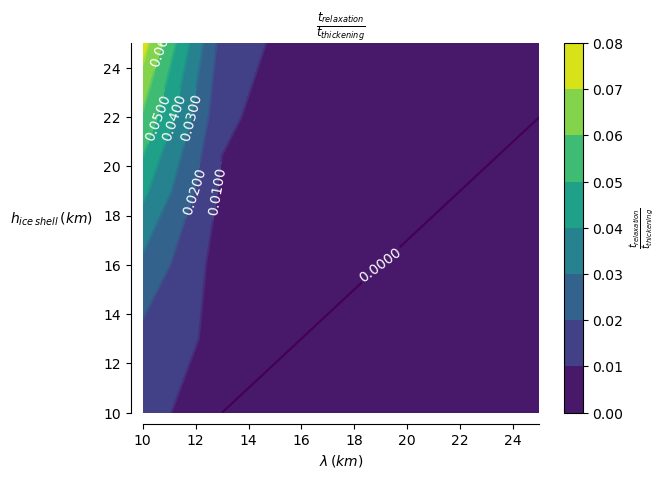

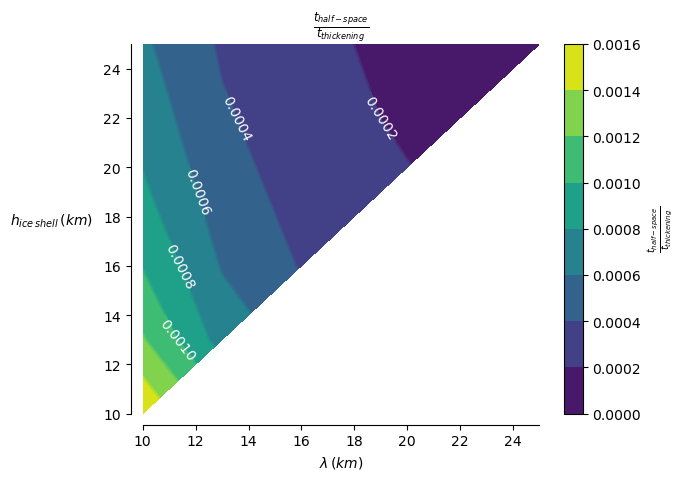

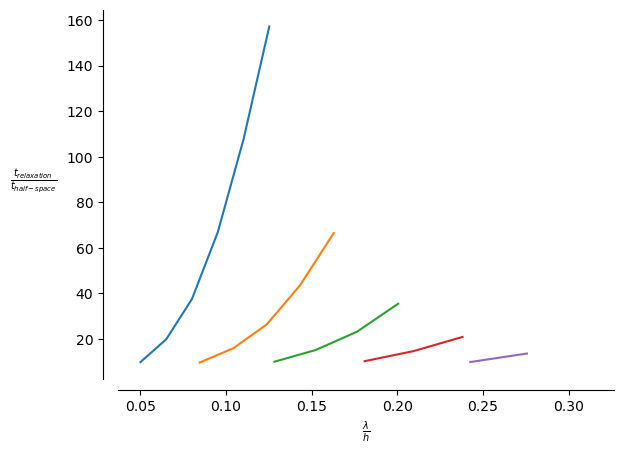

In [25]:
figure()

# cs = contour(Wavelength,Ice_shell,Time_vis/Time_thickening,locator=plt.LogLocator())
# clabel(cs,inline=true,colors="w",fontsize=10)
# contourf(Wavelength,Ice_shell,Time_vis./Time_thickening,cmap=get_cmap("viridis"))

cs = contour(Wavelength,Ice_shell,Time_vis/Time_thickening)
clabel(cs,inline=true,fmt="%0.4f",colors="w",fontsize=10)
contourf(Wavelength,Ice_shell,Time_vis/Time_thickening,cmap=get_cmap("viridis"))
title(L"\frac{t_{relaxation}}{t_{thickening}}")
colorbar(label=L"\frac{t_{relaxation}}{t_{thickening}}")
gca().set_xlabel(L"\lambda\,(km)")
gca().set_ylabel(L"h_{ice\,shell}\,(km)",rotation=0)
gca().yaxis.set_label_coords(-0.23,0.5)
gca().spines["top"].set_visible(false) # Hide the top edge of the axis
gca().spines["right"].set_visible(false) # Hide the right edge of the axis
gca().xaxis.set_ticks_position("bottom")
gca().yaxis.set_ticks_position("left")
gca().spines["left"].set_position(("axes",-0.03)) # Offset the left scale from the axis
gca().spines["bottom"].set_position(("axes",-0.03)) # Offset the bottom scale from the axis
# gca().spines["top"].set_color("none") # Remove the top axis boundary
# gca().spines["right"].set_color("none") # Remove the right axis boundary
show()

figure()

# cs = contour(Time_halfspace./Time_thickening)
# clabel(cs,inline=true,colors="w",fontsize=10)
# contourf(Time_halfspace./Time_thickening,cmap=get_cmap("viridis"))

cs = contour(Wavelength,Ice_shell,(Time_halfspace./Time_thickening))
clabel(cs,inline=true,colors="w",fontsize=10)
contourf(Wavelength,Ice_shell,(Time_halfspace./Time_thickening),cmap=get_cmap("viridis"))
title(L"\frac{t_{half-space}}{t_{thickening}}")

colorbar(label=L"\frac{t_{half-space}}{t_{thickening}}")
gca().set_xlabel(L"\lambda\,(km)")
gca().set_ylabel(L"h_{ice\,shell}\,(km)",rotation=0)
gca().yaxis.set_label_coords(-0.23,0.5)
gca().spines["top"].set_visible(false) # Hide the top edge of the axis
gca().spines["right"].set_visible(false) # Hide the right edge of the axis
gca().xaxis.set_ticks_position("bottom")
gca().yaxis.set_ticks_position("left")
gca().spines["left"].set_position(("axes",-0.03)) # Offset the left scale from the axis
gca().spines["bottom"].set_position(("axes",-0.03)) # Offset the bottom scale from the axis
# gca().spines["top"].set_color("none") # Remove the top axis boundary
# gca().spines["right"].set_color("none") # Remove the right axis boundary
show()

figure()
plot(Wavelength/Ice_shell,Time_vis./Time_halfspace)
gca().set_xlabel(L"\frac{\lambda}{h}")
gca().set_ylabel(L"\frac{t_{relaxation}}{t_{half-space}}",rotation=0)
gca().yaxis.set_label_coords(-0.17,0.5)
gca().spines["top"].set_visible(false) # Hide the top edge of the axis
gca().spines["right"].set_visible(false) # Hide the right edge of the axis
gca().xaxis.set_ticks_position("bottom")
gca().yaxis.set_ticks_position("left")
gca().spines["left"].set_position(("axes",-0.03)) # Offset the left scale from the axis
gca().spines["bottom"].set_position(("axes",-0.03)) # Offset the bottom scale from the axis
show()

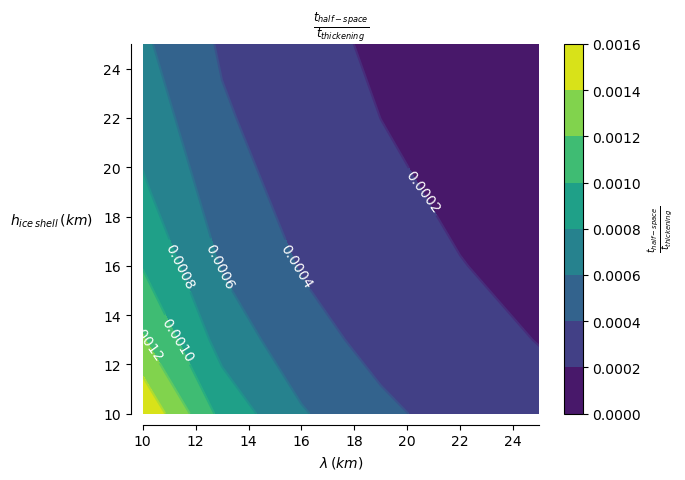

In [23]:
nx = 6
ny = 6
x = range(10.0,25.0,nx)
y = range(10.0,25.0,ny)
z = zeros(nx,ny)
f(x,y) = get_time_viscous(x*1e3)/get_thickening_time(y*1e3)
z = @.f(x,y')

figure()
cs = contour(x,y,z)
clabel(cs,inline=true,colors="w",fontsize=10)
contourf(x,y,z)
colorbar(label=L"\frac{t_{half-space}}{t_{thickening}}")
title(L"\frac{t_{half-space}}{t_{thickening}}")
gca().set_xlabel(L"\lambda")
gca().set_ylabel(L"h_{ice\,shell}\,(km)",rotation=0)
# gca().set_xlim([0.0,0.2])
# gca().set_ylim([1.0,3.0])
gca().yaxis.set_label_coords(-0.23,0.5)
gca().spines["top"].set_visible(false) # Hide the top edge of the axis
gca().spines["right"].set_visible(false) # Hide the right edge of the axis
gca().xaxis.set_ticks_position("bottom")
gca().yaxis.set_ticks_position("left")
gca().spines["left"].set_position(("axes",-0.03)) # Offset the left scale from the axis
gca().spines["bottom"].set_position(("axes",-0.03)) # Offset the bottom scale from the axis
show()
close() # Remove this line to show graph

""" or """

k = [f(i,j) for i in x, j in y]

figure()
cs = contour(x,y,k)
clabel(cs,inline=true,colors="w",fontsize=10)
contourf(x,y,k)
title(L"\frac{t_{half-space}}{t_{thickening}}")
colorbar(label=L"\frac{t_{half-space}}{t_{thickening}}")
gca().set_xlabel(L"\lambda\,(km)")
gca().set_ylabel(L"h_{ice\,shell}\,(km)",rotation=0)
# gca().set_xlim([0.0,0.2])
# gca().set_ylim([1.0,3.0])
gca().yaxis.set_label_coords(-0.23,0.5)
gca().spines["top"].set_visible(false) # Hide the top edge of the axis
gca().spines["right"].set_visible(false) # Hide the right edge of the axis
gca().xaxis.set_ticks_position("bottom")
gca().yaxis.set_ticks_position("left")
gca().spines["left"].set_position(("axes",-0.03)) # Offset the left scale from the axis
gca().spines["bottom"].set_position(("axes",-0.03)) # Offset the bottom scale from the axis
show()

In [ ]:
# Time_vis = vcat(map(x->x',Time_vis)...)

In [ ]:
# Time_halfspace = vcat(map(x->x',Time_halfspace)...)

In [ ]:
# tt = xx/yy
# tt = vcat(map(x->x',tt)...)

In [ ]:
# zz = Time_vis/Time_halfspace
# zz = vcat(map(x->x',zz)...)

In [ ]:
# nlambda = 2
# nhice = 2
# lambda = range(10.0,25.0,nlambda)
# h_ice = range(10.0,25.0,nhice)
# t_halfspace = zeros(nlambda,nhice)
# t_tic = zeros(nlambda,nhice)
# for i in 1:nlambda
#     for j in 1:nhice
#         ths = get_time_viscous(lambda[i]*1e3)
#         t_halfspace[i,j] = ths
#         ttic = get_thickening_time(h_ice[j]*1e3)
#         t_tic[i,j] = ttic
#     end
# end

# figure()
# contourf(t_halfspace./t_tic)
# colorbar(label=L"\frac{t_{halfspace}}{t_{thickening}}")
# gca().set_xlabel(L"\lambda")
# gca().set_ylabel(L"h_{ice\,shell}\,(km)",rotation=0)
# # gca().set_xlim([0.0,0.2])
# # gca().set_ylim([1.0,3.0])
# gca().yaxis.set_label_coords(-0.23,0.5)
# gca().spines["top"].set_visible(false) # Hide the top edge of the axis
# gca().spines["right"].set_visible(false) # Hide the right edge of the axis
# gca().xaxis.set_ticks_position("bottom")
# gca().yaxis.set_ticks_position("left")
# gca().spines["left"].set_position(("axes",-0.03)) # Offset the left scale from the axis
# gca().spines["bottom"].set_position(("axes",-0.03)) # Offset the bottom scale from the axis
# show()

# """ or """
# k = [f(x,y) for x in lambda, y in h_ice]

# figure()
# contourf(k)
# colorbar(label=L"\frac{t_{halfspace}}{t_{thickening}}")
# gca().set_xlabel(L"\lambda")
# gca().set_ylabel(L"h_{ice\,shell}\,(km)",rotation=0)
# # gca().set_xlim([0.0,0.2])
# # gca().set_ylim([1.0,3.0])
# gca().yaxis.set_label_coords(-0.23,0.5)
# gca().spines["top"].set_visible(false) # Hide the top edge of the axis
# gca().spines["right"].set_visible(false) # Hide the right edge of the axis
# gca().xaxis.set_ticks_position("bottom")
# gca().yaxis.set_ticks_position("left")
# gca().spines["left"].set_position(("axes",-0.03)) # Offset the left scale from the axis
# gca().spines["bottom"].set_position(("axes",-0.03)) # Offset the bottom scale from the axis
# show()